# AAI-501-02-SU23 - Final Project Proposal Team 1
### Paul Parks, Lishi Wang, Ivan Steklov
### University of San Diego
### AAI-501-02-SU23 - Introduction to AI
### Ying Lin
### July 17, 2023

## Imports

In [26]:
# imports
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

## Dataset

In [27]:
df = pd.read_csv('../Dataset/McDonald_s_Reviews.csv', encoding='latin-1', index_col='reviewer_id')
df.head()

,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
reviewer_id,,,,,,,,,
1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


## Cleaning

In [28]:
df['rating_int'] = df['rating'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,rating_int
reviewer_id,,,,,,,,,,
1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1
2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4
3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,1
4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,5
5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,1


In [29]:
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [30]:
X = df['review']
y = df['rating_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', y_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

reviewer_id
29558                                              Neutral
20877                                                Good 
32341    Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...
6553     Doesn't open 24hrs. Tables gotta get cleaned b...
26482    Horrible customer service I have ever seen. Th...
                               ...                        
16851                              Very clean and friendly
6266               Bum central avoid this one at all costs
11285    As always the service is slow,  its a busy spo...
861      Was able to get dinner in just under 9 minutes...
15796       The manger was so very rude and service sticks
Name: review, Length: 26716, dtype: object
Shape of X_train: (26716,)
Shape of X_test: (6680,)
Shape of y_train: (26716,)
Shape of y_test: (6680,)


In [31]:
def embed(input):
  return model(input)
xtrain = embed(X_train)
xtest = embed(X_test)

In [32]:
ridge = Ridge()
ridge.fit(xtrain, y_train)
r2_score = ridge.score(xtest, y_test)
print(f"The coefficient of determination (R^2 score) for the model trained on embeddings is: {r2_score}")

The coefficient of determination (R^2 score) for the model trained on embeddings is: 0.6741589814649641


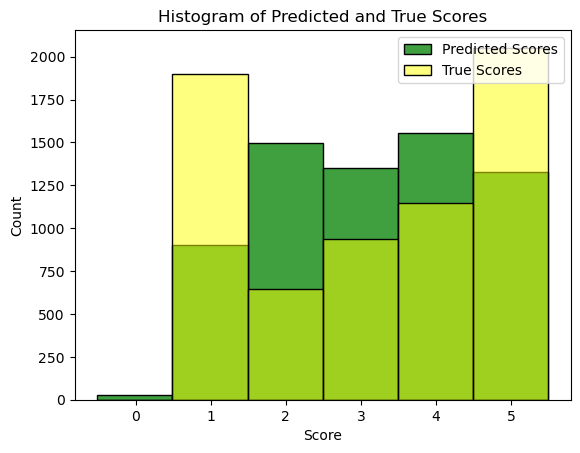

In [33]:
y_pred_embeddings = ridge.predict(xtest)

minv = min(y_test.min(), y_pred_embeddings.min())
maxv = max(y_test.max(), y_pred_embeddings.max())
bins = np.arange(minv, maxv + 1) - 0.5

sns.histplot(y_pred_embeddings, bins=bins, color='green', label='Predicted Scores')
sns.histplot(y_test, bins=bins, color='yellow', alpha=0.5, label='True Scores')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Histogram of Predicted and True Scores')
plt.legend()
plt.show()

In [38]:
def calculate_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score > 2:
        return "Neutral"
    elif score <= 2:
        return "Negative"
    else:
        return "Invalid Score"

def get_test_review(review):
    test_data = pd.DataFrame({
        'review': [review],
    }, index=[99999])
    test_data = test_data.reset_index().rename(columns={'index': 'reviewer_id'})
    test_data_f = test_data['review']
    review = embed(test_data_f)
    review_score = ridge.predict(review)[0]
    review_sentiment = calculate_sentiment(review_score)
    return [review_score, review_sentiment]

review = "I loved the nuggets"
print(get_test_review(review))

review = "I liked the nuggets"
print(get_test_review(review))

review = "Meh"
print(get_test_review(review))

review = "I did not like the nuggets"
print(get_test_review(review))

review = "I did not like the nuggets. Terrible service."
print(get_test_review(review))


[4.67723905880448, 'Positive']
[4.47726386717733, 'Positive']
[2.4896444010067507, 'Neutral']
[2.370868681863855, 'Neutral']
[1.7459968252374325, 'Negative']


## Can this be improved by using a Bayesian model?

In [35]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(xtrain, y_train)

r2_score_bayesian = bayesian_ridge.score(xtest, y_test)
print("R2 Score: ", r2_score_bayesian)



R2 Score:  0.674227346399676


```
This score is slightly better than the linear regression R2 score. 
Ridge r2 was 0.6741589814649641
BayesianRidge r2 was 0.674227346399676
The difference in predictive performance between the two models is negligible.
```

## Geolocation

In [50]:
import re

def get_state_from_address(address):
    state_match = re.search(r'\b[A-Z]{2}\b\s\d{5}', address)
    return state_match.group(0).split()[0] if state_match else ''

df['state'] = df['store_address'].apply(get_state_from_address)
# df['state'].describe()
# df['state'].head()
df['state'].nunique()
# unique_states = df[['state']].drop_duplicates()
# print(unique_states)

# Investigate the blank states
# rows_with_blank_state = df[df['state'] == '']
# print(rows_with_blank_state["store_address"])



12

In [52]:
# Grouping by state and calculating the mean rating
state_ratings = df.groupby('state')['rating_int'].mean().reset_index()
# Sorting the states by mean rating
state_ratings_sorted = state_ratings.sort_values(by='rating_int', ascending=False)
print(state_ratings_sorted)

   state  rating_int
11    VA    3.697674
2     DC    3.594436
8     PA    3.463035
0           3.383333
4     IL    3.362184
7     NY    3.299466
5     NJ    3.255710
1     CA    3.191455
9     TX    3.155415
6     NV    2.978641
3     FL    2.867514
10    UT    2.525843


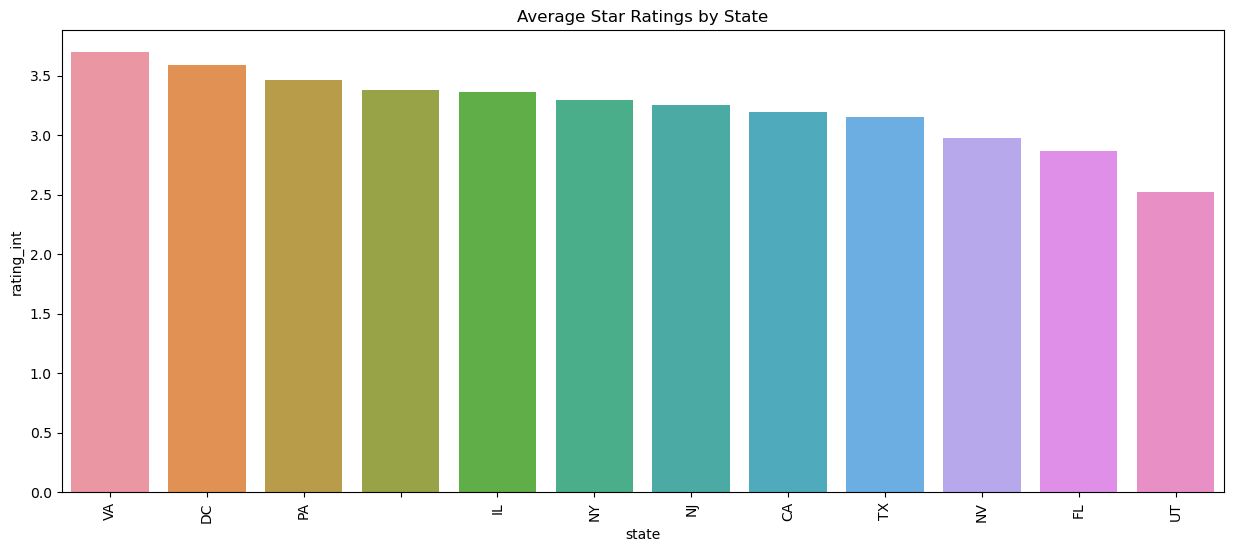

In [54]:
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='rating_int', data=state_ratings_sorted)
plt.xticks(rotation=90)
plt.title('Average Star Ratings by State')
plt.show()